# Bias-Variance Tradeoff, Regularization, Model Selection, Evaluation Metrics

If you have any question regrading this particular assignment feel free to email gibran.muhammad@ui.ac.id

# Table Of Content

* [Bias-Variance Tradeoff, Regularization, Model Selection](#Layer)
    * [Regularization and model selection](#Regularization-and-model-selection)
        * [Cross Validation](#Cross-Validation)
        * [K-Fold Cross Validation](#K-Fold-Cross-Validation) (score:2)
        * [Feature Selection](#Feature-Selection) (score:1)
    * [Bias-Variance Tradeoff](#Bias-Variance-Tradeoff) (score:1)
* [Evaluation metrics](#Evaluation-Metrics)
    * [Confusion Matrix](#Confusion-Matrix) (score:1)
    * [Point metrics](#Point-Metrics) (score:1)
    * [Precision vs Recall](#Precision-vs-Recall) (score:1)

In [16]:
#put your npm as string below
NPM = "1606882540"

#if someone that also take an ML class this year help you doing this assingment,put his/her NPM as list of string below
COLLABORATORS = []

#if youre using external sources please put its link as list of string below
SOURCES = []

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
def is_similar(X, Y):
    if isinstance(X, list) and isinstance(Y, list):
        if len(X) == len(Y):
            return all([is_similar(x,Y[i]) for i,x in enumerate(X)])
        else:
            return False
    return abs(X-Y) <= 1e-7

# Regularization and model selection



## Cross Validation


Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it.

In [19]:
from sklearn.datasets import load_iris
from random import shuffle

iris = load_iris()

X = iris.data
y = iris.target
z = list(zip(X, y))
shuffle(z)
X, y = zip(*z)
train_pct_index = int(0.7 * len(X))

X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

y_pred = logisticRegr.predict(X_test)

score = logisticRegr.score(X_test, y_test)
print('Logistic Regression score: ', score)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

score = gnb.score(X_test, y_test)
print('Gaussian Naive Bayes score: ', score)

Logistic Regression score:  0.9111111111111111
Gaussian Naive Bayes score:  0.9333333333333333


c:\users\alif\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\alif\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## K-Fold Cross Validation

A disadvantage of using a simple cross validation is we waste a portion of our data not used in training. K-fold cross validation tried to not wasted our precious data by split it into a K number of sections/folds where each fold is used as a testing set at some point.

### Exercise

implement a cross validation split that will split the dataset into k folds then use cross validation split method you make to implement a 10-fold cross validation on iris dataset using Gaussian Naive Bayes and Logistic Regression model

<b>note: If the dataset does not cleanly divide by the number of folds, there may be some remainder and they will not be used in the split, for example if you have 10 data, using 4-fold cross validation split you get 2 data per fold <b>

In [21]:
from random import seed
from random import randrange
from statistics import mean 


In [22]:
def cross_validation_split(dataset, folds=3):
    dataset_split = list()
    tmp = []
    size = len(dataset)
    cnt_data = 0
    for i in range(size):
        tmp.append(dataset[i])
        if((i+1)%(size//folds) == 0):
            dataset_split.append(tmp)
            cnt_data += 1
            tmp = []
        if(cnt_data >= folds):
            break;
    return dataset_split

In [23]:
dataset = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
folds = cross_validation_split(dataset, 4)
assert len(folds) == 4
assert len(folds[0]) == 2
assert len(folds[0]) == len(folds[1])

In [34]:
iris = load_iris()

X = iris.data
y = iris.target
z = [x for x in range(len(X))]

folds = cross_validation_split(z, 10)
lrscore = []
gnbscore = []

logisticRegr = LogisticRegression()
gnb = GaussianNB()

size_fold = len(folds[0])
size_folds = len(folds)
for i in range(size_folds):
    X_test = []
    y_test = []
    X_train = []
    y_train = []   
    # YOUR CODE HERE
    for data in folds[i]:
        X_test.append([data])
        
    for k in range(i*size_fold,i*size_fold+size_fold):
        y_test.append(y[k])
    
    for j in range(size_folds):
        if(j != i):
            for data in folds[j]:
                X_train.append([data])
            for m in range(j*size_fold,j*size_fold+size_fold):
                y_train.append(y[m])
    logisticRegr.fit(X_train, y_train)
    y_pred = logisticRegr.predict(X_test)
    lrscore.append(logisticRegr.score(X_test, y_test))
    
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    gnbscore.append(gnb.score(X_test, y_test))

print('Logistic Regression score: ', mean(lrscore))
print('Gaussian Naive Bayes score: ', mean(gnbscore))

Logistic Regression score:  0.7666666666666667
Gaussian Naive Bayes score:  0.96


c:\users\alif\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\alif\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\alif\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\alif\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.

## Feature Selection

Feature Selection is the process where you automatically or manually select those features which relevant to the learning task. With performing feature selection you can reduce overfitting, improves accuracy, and reduce training time.

### Exercise 

Given boston house-prices dataset, please perform a filter feature selection using mutual information with k = 2

<b>notes: you can used sklearn mutual_info_regression method<b>

In [35]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["Price"] = x.target
X = df.drop("Price",1)
y = df["Price"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [46]:
### mi is an array with the same shape as features
### each of mi element contain the value of mutual_information(feature, target)
def choose_k_highest(features, mi, k):
    features_selected = []
    # YOUR CODE HERE
    mi = [x for x in mi]
    feature_names = X.columns
    feature_mapping = {}
    for i,data in enumerate(mi):
        feature_mapping[data] = feature_names[i]
    mi.sort(reverse=True)
    
    for i in range(k):
        features_selected.append(feature_mapping[mi[i]])
    return features_selected

k = 2
features_selected = [''] * k
mutual_information = np.zeros(X.columns.shape)

# YOUR CODE HERE
mutual_information = mutual_info_regression(X, y)
features_selected = choose_k_highest(X.columns, mutual_information, k)

In [47]:
def compare(s, t):
    return sorted(s) == sorted(t)

features_selected = choose_k_highest(X.columns, mutual_information, 2)
assert compare(features_selected, ['RM', 'LSTAT'])

# Bias-Variance Tradeoff

A model can be bad for two diﬀerent:

* it is not accurate and doesn’t match the data well
* it is not very precise and there is a lot of variation in the results

We say a model has high bias when it is too simple to capture the complexity of the data, resulting to an underfit model.
<br>
high variance is when our model is too complex like using a 100 degree polynomial for quadratic data. In this situation we overfit the data.

Using the same low resolution written image digit dataset that we used in the previous homework, we will compare between Naive bayes and SVM model in classifying those image

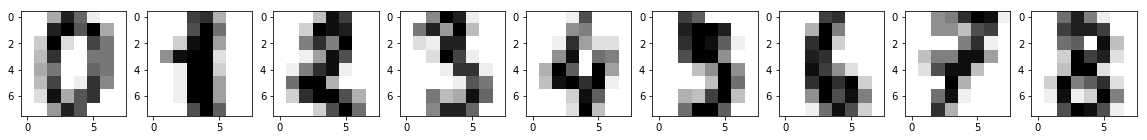

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

digits = load_digits()
X, y = digits.data, digits.target

plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(190+i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap=plt.cm.gray_r)

Split data, train model, plot the result !!!

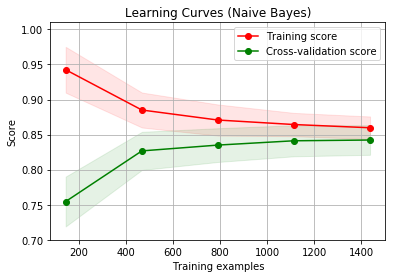

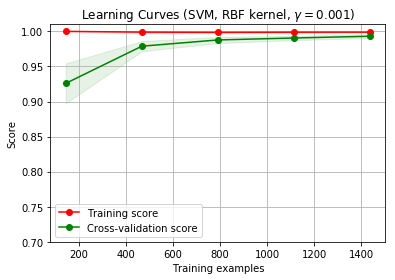

In [50]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

The code above will create 2 learning curve for both of our Naive Bayes and SVM model. 
<br>
If we want to compare our SVM and Naive Bayes model, what can you say according to the learning curve above ?

Untuk model naive bayes, apabila banyaknya data training ditingkatkan, maka akurasi training (yg direpresentasikan oleh score) akan menurun sampai di suatu titik dan akurasi cross validation akan naik sampai di suatu titik. Untuk model SVM, apabila banyaknya data training ditingkatkan, maka akurasi training (yg direpresentasikan oleh score) akan tetap dan akurasi cross validation akan naik sampai di suatu titik.

# Evaluation Metrics

## Confusion Matrix

A confusion matrix is a common evaluation matrix to evaluate a classification model. A confusion matrix is an N X N matrix, where N is the number of classes being predicted. Here is the example of an confusion matrix

![title](cmatrix.png)

For example we were given wisconsin breast cancer dataset and want to predict the type of cancer using logistic regression model

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df["Diagnosis"] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [53]:
X = cancer.data
y = cancer.target

logisticRegr = LogisticRegression()
logisticRegr.fit(X, y)

y_pred = logisticRegr.predict(X)

c:\users\alif\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Then to evaluate our model we used confusion matrix. 

<b>Task: Create a method (create_cm) that will build our own confusion matrix then find the True Positive, False Positive, True Negative, and False Negative using only numpy library</b>

In [61]:
def create_cm(y_act, y_pred):
    cm = None
    # YOUR CODE HERE
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    size = len(y_pred)
    for i in range(size):
        if(y_pred[i] == 1):
            if(y_act[i] == 1):
                TP += 1
            else:
                FP += 1
        else:
            if(y_act[i] == 1):
                FN += 1
            else:
                TN += 1
    cm = np.array([[TP,FP],[FN,TN]])
    return cm

cm = create_cm(y, y_pred)

### Please assign these variable according to your confusion matrix result
### you will not get any scored if these variable are not assigned
TP = None #True Positive
FP = None #False Positive
TN = None #True negative
FN = None #False Negative

# YOUR CODE HERE
TP = cm[0][0]
FP = cm[0][1]
TN = cm[1][1]
FN = cm[1][0]
cm

array([[348,  14],
       [  9, 198]])

In [58]:
assert cm.shape == (2,2)

## Point Metrics

After having the confusion matrix, please implements find the accuracy, precision, recall, specificity, and F1 score of your model

<b>notes: you can only used numpy library</b>

In [62]:
def accuracy(cm):
    result = 0
    # YOUR CODE HERE
    result = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
    return result
    
def precision(cm):
    result = 0
    # YOUR CODE HERE
    result = cm[0][0]/(cm[0][0]+cm[0][1])
    return result
    
def recall(cm):
    result = 0
    # YOUR CODE HERE
    result = cm[0][0]/(cm[0][0]+cm[1][0])
    return result
    
def specificity(cm):
    result = 0
    # YOUR CODE HERE
    result = cm[1][1]/(cm[0][1]+cm[1][1])
    return result
    
def f1score(cm):
    result = 0
    # YOUR CODE HERE
    result = 2*(precision(cm)*recall(cm))/(precision(cm)+recall(cm))
    return result

In [63]:
a = [1,1,1,0,1,0,1]
b = [0,0,1,0,1,0,1]
confusion_matrix = create_cm(a,b)

acc = accuracy(confusion_matrix)
prec = precision(confusion_matrix)
rec = recall(confusion_matrix)
spe = specificity(confusion_matrix)
f1 = f1score(confusion_matrix)

assert is_similar(acc, 0.7142857142857143)
assert is_similar(prec, 1.0)
assert is_similar(rec, 0.6)
assert is_similar(spe, 1.0)
assert is_similar(f1, 0.7499999999999999)


## Precision vs Recall

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

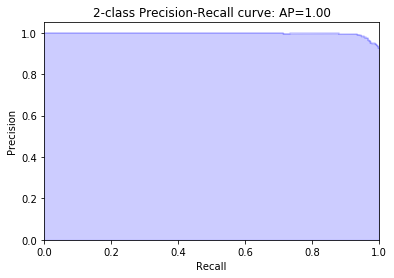

In [64]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

y_score = logisticRegr.decision_function(X)

average_precision = average_precision_score(y, y_score)
precision, recall, _ = precision_recall_curve(y, y_score)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Run the cell above and look at the graph, what can you say about that graph ?

Berdasarkan grafik di atas, average precision = 1 berarti semua tebakan positif bernilai benar. Sedangkan recall, ada berbagai macam hasil mulai dari 0.2, 0.4, 0.6, 0.8, dan 1.0. Recall berarti proporsi tebakan positif yg berhasil ditebak.


## OPTIONAL (NO SCORE)

In [ ]:
# give us your feedback of your experience on taking this test here
FEEDBACK = ""